# Exp 4: Image Compression #
## 1.	Aims ##

#### 1. Be familiar with some basic image fidelity assessment methods such as MSE, PSNR and SSIM.

#### 2. Be familiar with the process of JPEG compression.
    
#### 3. Be familiar with Discrete Cosine Transform, Huffman Coding, and Predictive Coding.

## 2.	Steps and Requirements

### (1) Compression Ratio and Relative Coding Redundancy
(a) Load the image bunny.png. Save it as a JPEG image with a quality factor of 90, 60, 10, respectively. Name the images as b90.jpg, b60.jpg, b10.jpg, respectively. 

(b) Display the original image and the compressed images.

(c) Calculate the *Compression Ratio* and *Relative Data Redundancy* between the PNG image and JPEG images according to the file sizes. (Tips: ``os.path.getsize``)

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

Original PNG size: 383655 bytes
JPEG (Quality 90) size: 45679 bytes, Compression Ratio: 8.40, Relative Data Redundancy: 0.88
JPEG (Quality 60) size: 20562 bytes, Compression Ratio: 18.66, Relative Data Redundancy: 0.95
JPEG (Quality 10) size: 7969 bytes, Compression Ratio: 48.14, Relative Data Redundancy: 0.98



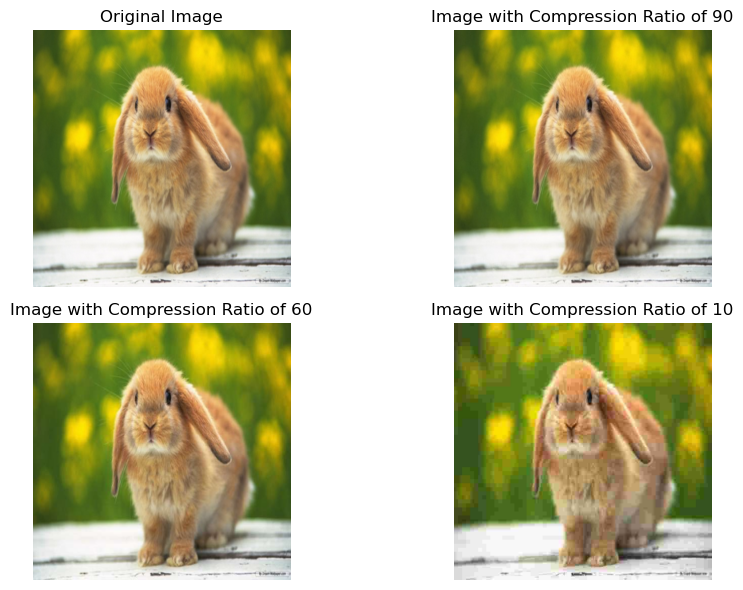

In [2]:
# (a)Load the original PNG image
image = cv2.imread('images/bunny.png')

# Save JPEG images with different compression qualities
quality_90 = 90
quality_60 = 60
quality_10 = 10
cv2.imwrite('b_90.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality_90])
cv2.imwrite('b_60.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality_60])
cv2.imwrite('b_10.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality_10])

# Read the saved JPEG images
image_90 = cv2.imread('b_90.jpg')
image_60 = cv2.imread('b_60.jpg')
image_10 = cv2.imread('b_10.jpg')
image_90 = cv2.cvtColor(image_90, cv2.COLOR_BGR2RGB)
image_60 = cv2.cvtColor(image_60, cv2.COLOR_BGR2RGB)
image_10 = cv2.cvtColor(image_10, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get file sizes
original_size = os.path.getsize('images/bunny.png')
size_90 = os.path.getsize('b_90.jpg')
size_60 = os.path.getsize('b_60.jpg')
size_10 = os.path.getsize('b_10.jpg')

# (c) Calculate compression ratios
compression_ratio_90 = original_size / size_90
compression_ratio_60 = original_size / size_60
compression_ratio_10 = original_size / size_10

# Calculate relative data redundancy
relative_redundancy_90 = 1 - (size_90 / original_size)
relative_redundancy_60 = 1 - (size_60 / original_size)
relative_redundancy_10 = 1 - (size_10 / original_size)

# Print results
print(f"Original PNG size: {original_size} bytes")
print(f"JPEG (Quality 90) size: {size_90} bytes, Compression Ratio: {compression_ratio_90:.2f}, Relative Data Redundancy: {relative_redundancy_90:.2f}")
print(f"JPEG (Quality 60) size: {size_60} bytes, Compression Ratio: {compression_ratio_60:.2f}, Relative Data Redundancy: {relative_redundancy_60:.2f}")
print(f"JPEG (Quality 10) size: {size_10} bytes, Compression Ratio: {compression_ratio_10:.2f}, Relative Data Redundancy: {relative_redundancy_10:.2f}\n")

# (b) Plot the images
plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image_90)
plt.title('Image with Compression Ratio of 90')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(image_60)
plt.title('Image with Compression Ratio of 60')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(image_10)
plt.title('Image with Compression Ratio of 10')
plt.axis('off')

plt.tight_layout()
plt.show()

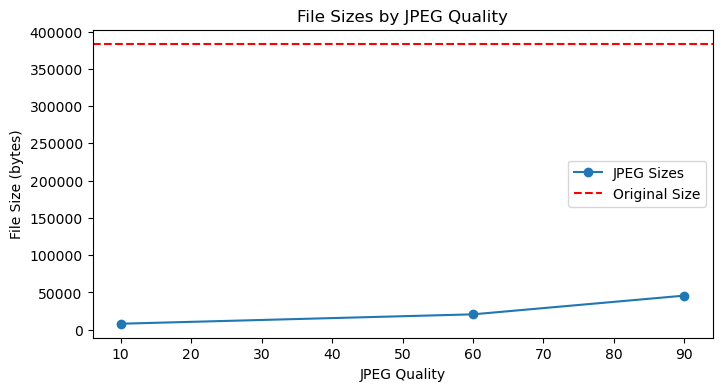

In [3]:
# visualize the size comparison between original image and the compressed images
qualities = [quality_90, quality_60, quality_10]
plt.figure(figsize=(8, 4))
plt.plot(qualities, [size_90, size_60, size_10], marker='o', label='JPEG Sizes')
plt.axhline(y=original_size, color='r', linestyle='--', label='Original Size')
plt.xlabel('JPEG Quality')
plt.ylabel('File Size (bytes)')
plt.title('File Sizes by JPEG Quality')
plt.legend()
plt.show()

 ### (2) Fidelity Criteria 
(a) Load the saved JPEG images. Use functions from ``skimage.metrics`` to calculate MSE, PSNR, and SSIM values between the PNG image and JPEG images. 

(b) Implement a SSIM function by yourself according to [1].

[1] Wang Z, Bovik AC, Sheikh HR, Simoncelli EP. Image quality assessment: from error visibility to structural similarity. IEEE Trans Image Process. 2004 Apr;13(4):600-12.

In [4]:
import numpy as np
import skimage.metrics
import cv2

In [5]:
def ssim_compute(img1, img2, C1=1e-5, C2=1e-6):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions and number of channels")

    # Ensure the images are in the range [0, 255]
    img1 = np.clip(img1, 0, 255)
    img2 = np.clip(img2, 0, 255)
    
    # Convert images to float type for calculation
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    
    # compute mean, variance and covariance of the two images
    mean1 = np.mean(img1)
    mean2 = np.mean(img2)
    var1 = np.var(img1)
    var2 = np.var(img2)
    cov = np.cov(img1.ravel(), img2.ravel())[0][1]
    C3 = C2 / 2

    # compute the different part of the ssim
    luminance  = (2 * mean1 * mean2 + C1) / (mean1 ** 2 + mean2 ** 2 + C1)
    contrast = (2 * np.sqrt(var1) * np.sqrt(var2) + C2) / (var1 + var2 + C2)
    structure = (cov + C3) / (np.sqrt(var1) * np.sqrt(var2) + C3)

    ssim_n = luminance * contrast * structure
    return ssim_n

In [6]:
# (a) Load the saved JPEG images. 
# Use functions from ``skimage.metrics`` to calculate MSE, PSNR, and SSIM values between the PNG image and JPEG images. 
image1 = cv2.imread('images/bunny.png')
image_90 = cv2.imread('b_90.jpg')
image_60 = cv2.imread('b_60.jpg')
image_10 = cv2.imread('b_10.jpg')
jpeg_images = [image_10, image_60, image_90]

for i, jpeg_image in enumerate(jpeg_images):
    mse = skimage.metrics.mean_squared_error(image1, jpeg_image)
    psnr = skimage.metrics.peak_signal_noise_ratio(image1, jpeg_image)
    ssim = skimage.metrics.structural_similarity(image1, jpeg_image, channel_axis=-1)
    
    print(f"JPEG Image {i+1}:")
    print(f"MSE: {mse:.2f}")
    print(f"PSNR: {psnr:.2f}")
    print(f"SSIM: {ssim:.2f}\n")

JPEG Image 1:
MSE: 62.48
PSNR: 30.17
SSIM: 0.81

JPEG Image 2:
MSE: 8.69
PSNR: 38.74
SSIM: 0.95

JPEG Image 3:
MSE: 2.96
PSNR: 43.41
SSIM: 0.98



In [7]:
# (b) Implement a SSIM function by yourself according to [1].
ssim_values = []
for i, jpeg_image in enumerate(jpeg_images):
    for j in range(image1.shape[2]): 
        channel_ssim = ssim_compute(image1[..., i], jpeg_image[..., i])
        ssim_values.append(channel_ssim)
    total_ssim = np.mean(ssim_values)
    print(f"The SSIM value between image1 and jpeg_image {i+1} is: {total_ssim:.4f}")

The SSIM value between image1 and jpeg_image 1 is: 0.9922
The SSIM value between image1 and jpeg_image 2 is: 0.9955
The SSIM value between image1 and jpeg_image 3 is: 0.9969


### (3) Simulation of a Part of JPEG Compression
(a) Load the grayscale image lenagray.tiff.

(b) Shift the pixel intensity by -128. 

(c) Divide the image into non-overlapped 8$*$8 subimages and perform 8$*$8 block DCT on each subimage. (Tips: ``cv2.dct`` or ``scipy.fftpack.dct``)

(d) Use a quantization table with QF=50 for quantization. 

(e) Perform lossless predictive coding (difference coding) of DC coefficients by using the coefficient in the previous subimage as reference (a raster scan mannar).  

(f) Sort 63 AC coefficients in each block in a ZigZag order. Converted them into a one-dimensional vector. 

(g) Save all the compressed data into a Numpy data format (refered to as NPY/NPZ (.npy or .npz) file)  (Tips: ``np.save`` or ``np.savez``).

(h) Compress the npy/npz file to a zip file (refered to as NPZzip). Compress the TIFF image to another zip file (refered to as TIFFzip) (Tips: ``zipfile.Zipfile``, ``zipfile.write``, ``zipfile.close``. For more details please refer to https://docs.python.org/3/library/zipfile.html and https://cloud.tencent.com/developer/article/1431438).

(i) Calculate the Compression Ratio between the TIFF image and the NPY/NPZ file according to the file sizes. Calculate the Compression Ratio between the TIFF image and the NPZzip file according to the file sizes. Calculate the Compression Ratio between the TIFFZzip and the NPZzip according to the file sizes.

(j) Load the above saved file. Decode it to a recovered image.

(k) Compute the MSE and PSNR of the recovered image, and display it with the original image side by side.

``quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12,14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)``

In [8]:
import cv2
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import os
import math

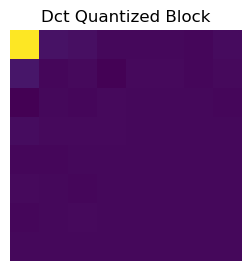

[811.0, -41.0, -73.0, -32.0, 109.0, 276.0, -61.0, 1802.0, 2772.0, 232.0, 63.0, 10.0, 5.0, 185.0, -112.0, -1987.0, -2907.0, -568.0, 870.0, -1165.0, -61.0, 6.0, 186.0, -3.0, -160.0, 180.0, -106.0, 533.0, -368.0, -23.0, -33.0, -137.0, 108.0, 353.0, 1080.0, 1277.0, -700.0, 1567.0, 2344.0, -275.0, -1740.0, -3698.0, 249.0, -170.0, 44.0, 33.0, -54.0, 13.0, 44.0, 28.0, 543.0, 932.0, -103.0, 3590.0, 483.0, 74.0, -468.0, 390.0, -443.0, 374.0, -1142.0, 382.0, 489.0, -3808.0, -1287.0, 2.0, -18.0, -41.0, 192.0, 186.0, -161.0, 2207.0, 2425.0, 205.0, 129.0, -27.0, 1.0, 215.0, 200.0, -1485.0, -1449.0, -2048.0, -781.0, 196.0, -171.0, -365.0, 274.0, -89.0, 84.0, 481.0, -389.0, 1151.0, -1066.0, 665.0, -1119.0, 551.0, -202.0, 1076.0, 961.0, 491.0, -795.0, 791.0, 2670.0, 363.0, -194.0, -4754.0, -353.0, 1.0, 24.0, 11.0, -73.0, -17.0, -25.0, -24.0, 70.0, 1208.0, 272.0, 1496.0, 2328.0, 194.0, -61.0, 93.0, -55.0, -68.0, -1248.0, -2129.0, 1719.0, 19.0, -3761.0, 32.0, -10.0, 8.0, 220.0, -31.0, -152.0, 1966.0, 27

In [9]:
# (a) Load the grayscale image lenagray.tiff
image = cv2.imread("lenagray.tiff", cv2.IMREAD_GRAYSCALE)
# (b) Shift the pixel intensity by -128
shifted_image = (image - 128).astype(np.float32)

# (c) Divide the image into non-overlapped 8x8 subimages and perform 8x8 block DCT on each subimage
dct_subimages = []
for i in range(0, shifted_image.shape[0], 8):
    for j in range(0, shifted_image.shape[1], 8):
        subimage = shifted_image[i:i+8, j:j+8]
        dct_block = cv2.dct(subimage)
        dct_subimages.append(dct_block)

# (d) Use a quantization table with QF=50 for quantization
QF = 50
quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61], 
                               [12, 12,14, 19, 26, 58, 60, 55], 
                               [14, 13, 16, 24, 40, 57, 69, 56], 
                               [14, 17, 22, 29, 51, 87, 80, 62], 
                               [18, 22, 37, 56, 68, 109, 103, 77], 
                               [24, 35, 55, 64, 81, 104, 113, 92], 
                               [49, 64, 78, 87, 103, 121, 120, 101], 
                               [72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)
quantization_table = quantization_table / QF
quantized_dct_subimages = []
for dct_block in dct_subimages:
    # Apply quantization
    quantized_block = np.round(dct_block / quantization_table)
    quantized_dct_subimages.append(quantized_block)

index = 0  
quantized_dct_block = quantized_dct_subimages[index]

# (e) Perform lossless predictive coding (difference coding) of DC coefficients
predictive_dc_coefficients = []
previous_dc_coefficient = 0
for dct_block in quantized_dct_subimages:
    # DC coefficients of Difference coding  
    dc_coefficient = dct_block[0, 0] - previous_dc_coefficient
    predictive_dc_coefficients.append(dc_coefficient)
    previous_dc_coefficient = dct_block[0, 0]

# Display Block after DCT and predictive dc coefficients list 
# to check whether the codes are correctly implemented to meet the questions
plt.figure(figsize=(6, 3))
plt.imshow(quantized_dct_block)
plt.title('Dct Quantized Block')
plt.axis('off')
plt.show()
print(predictive_dc_coefficients)

### In the next block, I use the given functions in the file zigzag.txt

In [10]:
def zigzag_points(rows, cols):
    """根据行和列找到对应的zigzag排序的点
    
    Arguments:
        rows {[type]} -- [description]
        cols {[type]} -- [description]
    
    Returns:
        [type] -- [description]
    """
    # 枚举方向常量
    UP, DOWN, RIGHT, LEFT, UP_RIGHT, DOWN_LEFT = range(6)

    # zigzag排序中有六个方向，上下左右右上以及左下
    def move(direction, point):
        return {
            UP: lambda point: (point[0] - 1, point[1]),
            DOWN: lambda point: (point[0] + 1, point[1]),
            LEFT: lambda point: (point[0], point[1] - 1),
            RIGHT: lambda point: (point[0], point[1] + 1),
            UP_RIGHT: lambda point: move(UP, move(RIGHT, point)),
            DOWN_LEFT: lambda point: move(DOWN, move(LEFT, point))
        }[direction](point)

    # 判断点是否在边界内
    def inbounds(point):
        return 0 <= point[0] < rows and 0 <= point[1] < cols

    # 从左上角开始
    point = (0, 0)

    # 当move_up为True的时候往右上角移动，false的时候往左下角移动。
    move_up = True

    for i in range(rows * cols):
        #产生rows*cols的块内的所有点的zigzag排序向量
        yield point
        if move_up:
            if inbounds(move(UP_RIGHT, point)):
                point = move(UP_RIGHT, point)
            else:
                move_up = False #往右上已经到顶，该往右了。
                if inbounds(move(RIGHT, point)):
                    point = move(RIGHT, point)
                else:
                    point = move(DOWN, point)
        else:
            if inbounds(move(DOWN_LEFT, point)):
                point = move(DOWN_LEFT, point)
            else:
                move_up = True
                if inbounds(move(DOWN, point)):
                    point = move(DOWN, point)
                else:
                    point = move(RIGHT, point)

def block_to_zigzag(block):
    return np.array([block[point] for point in zigzag_points(*block.shape)])

def zigzag_to_block(zigzag):
    # assuming that the width and the height of the block are equal
    rows = cols = int(math.sqrt(len(zigzag)))

    if rows * cols != len(zigzag):
        raise ValueError("length of zigzag should be a perfect square")

    block = np.empty((rows, cols), np.int32)

    for i, point in enumerate(zigzag_points(rows, cols)):
        block[point] = zigzag[i]

    return block

In [11]:
# (f) Sort 63 AC coefficients in each block in a ZigZag order
zigzag_ac_coefficients = []
for block in quantized_dct_subimages:
    # Sort AC coefficients in a ZigZag order
    zigzag_ac_coefficient = block_to_zigzag(block)[1:]
    # Append sorted coefficients to the list
    zigzag_ac_coefficients.append(zigzag_ac_coefficient)

# Check the code result
print(zigzag_ac_coefficients)

[array([ 22.,  33., -18.,  -3.,  16.,  -1.,   2.,  -1.,   8.,  -3.,   3.,
        -5., -13.,   1.,  -1.,   4.,   4.,   4.,  -3.,   3.,  -2.,   1.,
        -0.,   2.,  -1.,   3.,  -4.,   5.,  -3.,  -0.,  -1.,  -1.,  -2.,
         0.,   1.,  -0.,   2.,  -0.,   1.,  -1.,   1.,   3.,  -2.,   0.,
         1.,  -1.,   1.,  -1.,  -1.,   1.,   0.,  -1.,   1.,  -0.,   1.,
        -1.,  -0.,   1.,  -0.,   0.,  -0.,   0.,   0.], dtype=float32), array([ 80.,  50., -17., -11.,  13.,  15.,   8.,   9.,  -4.,   7.,  -5.,
        -5.,  13., -16.,  12.,  -7.,  -6.,   2.,   3.,  -0.,  -3.,  -1.,
         0.,   1.,   1.,   3.,   2.,  -5.,   5.,  -1.,   2.,   0.,  -1.,
         0.,   2.,   0.,   1.,   0.,  -2.,  -0.,  -1.,   0.,   0.,  -1.,
         0.,   1.,  -1.,  -0.,   0.,   0.,  -0.,   2.,  -1.,   1.,  -1.,
        -0.,  -0.,   0.,   0.,  -1.,   0.,   0.,  -0.], dtype=float32), array([ 41.,  42., -14.,  -3., -21., -25.,  -3.,  -1.,  -5.,   7.,   3.,
         1., -14.,   2.,   5.,   2.,   4.,   1.,  -2

In [12]:
# g) Save all the compressed data into a Numpy data format (refered to as NPY/NPZ (.npy or .npz) file) (Tips: np.save or np.savez).
#  Save DC coefficients of Difference coding as a .npy file
np.save('predictive_dc_coefficients.npy', np.array(predictive_dc_coefficients))

# Transform sorted AC coefficients in a ZigZag order into a numPy array，and save as a .npy file 
ac_coefficients_array = np.array(zigzag_ac_coefficients)
np.save('zigzag_ac_coefficients.npy', ac_coefficients_array)

# Or, save all data in a .npz file
compressed_data = {
    'dc_coefficients': np.array(predictive_dc_coefficients),
    'ac_coefficients': ac_coefficients_array
}
np.savez('compressed_image_data.npz', **compressed_data)

print("Compressed data saved successfully.")

Compressed data saved successfully.


In [13]:
# Define funtion to compress npz file
def compress_npy_npz_to_zip(npz_filename, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        # Add npy/npz files to ZIP file
        zipf.write(npz_filename, arcname=npz_filename)

# Define funtion to compress tiff file
def compress_tiff_to_zip(tiff_filename, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        # Add tiff files to ZIP file
        zipf.write(tiff_filename, arcname=tiff_filename)

# Define function to comute compress ratio
def calculate_compression_ratio(original_size, compressed_size):
    return  original_size / compressed_size

In [14]:
# h) Compress the npy/npz file to a zip file (refered to as NPZzip). 
# Compress the TIFF image to another zip file (refered to as TIFFzip) 
# Tips:use function zipfile.Zipfile, zipfile.write, zipfile.close

# Set input file names
npz_filename = 'compressed_image_data.npz'
tiff_filename = 'lenagray.tiff'

# Set output name of ZIP files
npz_zip_filename = 'NPZzip.zip'
tiff_zip_filename = 'TIFFzip.zip'

# Implement compress
compress_npy_npz_to_zip(npz_filename, npz_zip_filename)
compress_tiff_to_zip(tiff_filename, tiff_zip_filename)

print(f"The NPZ file has been successfully compressed to {npz_zip_filename}")
print(f"The TIFF image has been successfully compressed to {tiff_zip_filename}")

The NPZ file has been successfully compressed to NPZzip.zip
The TIFF image has been successfully compressed to TIFFzip.zip


In [15]:
# (i) Calculate the Compression Ratio between the TIFF image and the NPY/NPZ file according to the file sizes. 
# Calculate the Compression Ratio between the TIFF image and the NPZzip file according to the file sizes. 
# Calculate the Compression Ratio between the TIFFZzip and the NPZzip according to the file sizes.
tiff_size = os.path.getsize(tiff_filename)
npz_size = os.path.getsize(npz_filename)
npz_zip_size = os.path.getsize(npz_zip_filename)
tiff_zip_size = os.path.getsize(tiff_zip_filename)

# Compute compress ratio
tiff_to_npz_ratio = calculate_compression_ratio(tiff_size, npz_size)
tiff_to_npz_zip_ratio = calculate_compression_ratio(tiff_size, npz_zip_size)
tiff_zip_to_npz_zip_ratio = calculate_compression_ratio(tiff_zip_size, npz_zip_size)

# Print compress ratio
print(f"Compression Ratio (TIFF to NPY/NPZ): {tiff_to_npz_ratio:.2f}")
print(f"Compression Ratio (TIFF to NPZzip): {tiff_to_npz_zip_ratio:.2f}")
print(f"Compression Ratio (TIFFzip to NPZzip): {tiff_zip_to_npz_zip_ratio:.2f}")

Compression Ratio (TIFF to NPY/NPZ): 0.25
Compression Ratio (TIFF to NPZzip): 0.25
Compression Ratio (TIFFzip to NPZzip): 0.25


In [16]:
# reconstruct the image
def reconstruct_image(dc_diff, ac_coeffs, quant_table):
    h = dc_diff.shape[0]
    recovered_image = np.zeros((512,512), dtype=np.float32)
    previous_dc = 0
    j = i = 0
    
    for t in range(0, h):
        dc = dc_diff[t]
        dc = dc +  previous_dc
        previous_dc =dc
        ac = ac_coeffs[t]
        block_zigzag = np.insert(ac,0,dc)
        block = np.round(zigzag_to_block(block_zigzag) * quant_table)
        block = cv2.idct(block).astype(np.float32)
        i = t // (512 // 8) * 8
        j = t % (512 // 8) * 8
        recovered_image[i:i+8, j:j+8] = block
        
    recovered_image = np.clip(recovered_image, 0, 255).astype(np.uint8)
    recovered_image += 128
    recovered_image = recovered_image.astype(np.uint8)
    return recovered_image

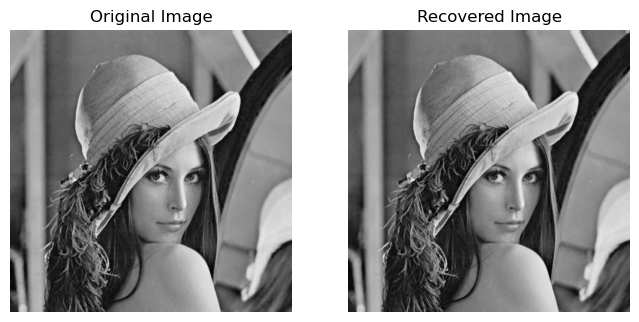

MSE = 0.559
PSNR = 50.659 dB


In [17]:
compressed_data = np.load('compressed_image_data.npz', allow_pickle=True)
recovered_dc_coefficients = compressed_data['dc_coefficients']
recovered_ac_coefficients = compressed_data['ac_coefficients']
recovered_image = reconstruct_image(recovered_dc_coefficients, recovered_ac_coefficients, quantization_table)
recovered_image = np.clip(recovered_image, 0, 255).astype(np.uint8)

mse = np.mean((image - recovered_image) ** 2)
psnr = 20 * np.log10(255.0 / np.sqrt(mse))

plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(recovered_image, cmap='gray')
plt.title('Recovered Image')
plt.axis('off')
plt.show()

print(f'MSE = {mse:.3f}')
print(f'PSNR = {psnr:.3f} dB')

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.